<a href="https://colab.research.google.com/github/magangashadreck/MCLRN/blob/master/Finger0to5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==2.1.0

In [0]:
pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.0.2)


In [0]:
import tensorflow as tf
tf.test.gpu_device_name()
from tensorflow import keras


import numpy as np
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
%matplotlib inline 

print(tf.__version__)

2.1.0


In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_file = "/content/drive/My Drive/Colab Notebooks/train.zip"

In [0]:
import zipfile

with zipfile.ZipFile(train_file, 'r') as z:
    z.extractall()

In [0]:
import os
import cv2

def load_image(file_path):
    return cv2.imread(file_path)

def extract_label(file_name):
    return 1 if "One" in file_name else 2 if "Two" in file_name else 3 if "Three" in file_name else 4 if "Four" in file_name else 5 if "Five" in file_name else 0

train_path = "./train/"
image_files = os.listdir(train_path)
train_images = [load_image(train_path + file) for file in image_files]
train_labels = [extract_label(file) for file in image_files] 

In [0]:
def preprocess_image(img, side=128):
    min_side = min(img.shape[0], img.shape[1])
    img = img[:min_side, :min_side]
    img = cv2.resize(img, (side,side))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img / 255.0

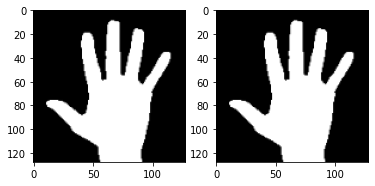

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

preview_index = 1002
plt.subplot(1,2,1)
plt.imshow(train_images[preview_index])
plt.subplot(1,2,2)
plt.imshow(preprocess_image(train_images[preview_index]), cmap="gray")

In [0]:
for i in range(len(train_images)):
    train_images[i] = preprocess_image(train_images[i])

In [0]:
train_images = np.expand_dims(train_images, axis=-1)
train_labels = np.array(train_labels)
print(train_images.shape, train_labels.shape)

(12006, 128, 128, 1) (12006,)


In [0]:
train_labels

array([2, 1, 2, ..., 4, 4, 4])

In [0]:
layers = [
    keras.layers.Flatten(input_shape=train_images.shape[1:]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
]
model = keras.Sequential(layers)

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10)

Train on 12006 samples
Epoch 1/10
12006/12006 [==============================] - 3s 277us/sample - loss: 0.1326 - accuracy: 0.9707
Epoch 2/10
12006/12006 [==============================] - 2s 140us/sample - loss: 3.2734e-04 - accuracy: 1.0000
Epoch 3/10
12006/12006 [==============================] - 2s 137us/sample - loss: 0.0384 - accuracy: 0.9945
Epoch 4/10
12006/12006 [==============================] - 2s 143us/sample - loss: 0.0338 - accuracy: 0.9930
Epoch 5/10
12006/12006 [==============================] - 2s 141us/sample - loss: 4.5777e-05 - accuracy: 1.0000
Epoch 6/10
12006/12006 [==============================] - 2s 140us/sample - loss: 2.1823e-05 - accuracy: 1.0000
Epoch 7/10
12006/12006 [==============================] - 2s 138us/sample - loss: 1.6974e-05 - accuracy: 1.0000
Epoch 8/10
12006/12006 [==============================] - 2s 140us/sample - loss: 1.3999e-05 - accuracy: 1.0000
Epoch 9/10
12006/12006 [==============================] - 2s 137us/sample - loss: 1.1717e-05 

In [0]:
from google.colab import files
uploads = files.upload()

Saving test_1.png to test_1.png
Saving test_2.png to test_2.png
Saving test_3.png to test_3.png
Saving test_4.png to test_4.png
Saving test_5.png to test_5.png
Saving test_6.png to test_6.png
Saving test_7.png to test_7.png
Saving test_8.png to test_8.png
Saving test_9.png to test_9.png
Saving test_10.png to test_10.png
Saving test_11.png to test_11.png
Saving test_12.png to test_12.png


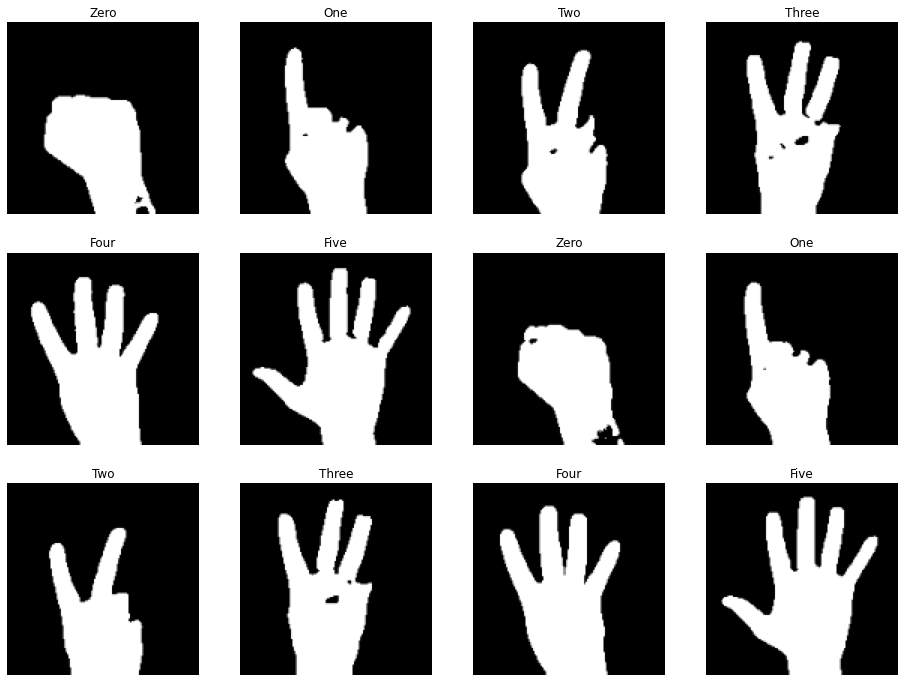

In [0]:
eval_images = [preprocess_image(load_image(file)) for file in uploads.keys()]
eval_model = tf.keras.Sequential(layers)
#eval_model.load_weights(model.tf)
eval_predictions = eval_model.predict(np.expand_dims(eval_images, axis=-1))

cols = 4
rows = np.ceil(len(eval_images)/cols)
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)
for i in range(len(eval_images)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(eval_images[i], cmap="gray")
    plt.title("One" if np.argmax(eval_predictions[i])==1 else "Two" if np.argmax(eval_predictions[i])==2 else "Three" if np.argmax(eval_predictions[i])==3 else "Four" if np.argmax(eval_predictions[i])==4 else "Five" if np.argmax(eval_predictions[i])==5 else "Zero")
    plt.axis('off')